In [ ]:
Data Exploration: Figure out what the data is telling you, 
gain insights, 
look for inconsistencies, 
come up with ideas as to how you can transform the data further down the road, 
build hypothesis as to how you can fix the inconsistencies that you can observe, 
try to find and fix the outliers(if you think that they require to be fixed).

Data Visualization: Plot graphs and show the findings.

Data Transformation: Convert to correct format, generate new columns which will have impact on our predictions, 
impute the missing values (for now just use mean, median, mode for imputation purpose)


In [36]:
#importing necessary libraries
import pandas as pd

In [5]:
#Importing the .csv file
blackFridayData=pd.read_csv('blackFridaytrain.csv')
blackFridayData

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [16]:
 #Finding dimensions of dataset(rows,columns)
blackFridayData.shape

(550068, 12)

In [17]:
#Dimensions in Detail
blackFridayData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [22]:
#Observing the data above we found that Product_category_2 and Product_category_3 contains multiple null values
550068-376430

173638

In [21]:
550068-166821

383247

In [14]:
#Confirming the null values using inbuilt functions
blackFridayData.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# looking at the training data from end
blackFridayData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
# looking at the training data from end
blackFridayData.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [16]:
#Describing details of the data
blackFridayData.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [20]:
blackFridayData['User_ID'].nunique()

5891

In [21]:
#There were around 5891 unique users available.So drawing a graph based on User ID will not give much insight.Hence removing it
blackFridayData.drop(['User_ID'],axis=1,inplace=True)
blackFridayData.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [22]:
blackFridayData['Product_ID'].nunique()

3631

In [23]:
#There were around 3631 unique users available.So drawing a graph based on this column will not give much insight.Hence removing it
blackFridayData.drop(['Product_ID'],axis=1,inplace=True)
blackFridayData.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [42]:
blackFridayData.Product_Category_1.unique() 

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [43]:
blackFridayData.Product_Category_2.unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [44]:
blackFridayData.Product_Category_3.unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [26]:
# Tried replacing the NA values with Mean however received error
blackFridayData['Product_Category_2'] = blackFridayData['Product_Category_2'].fillna(blackFridayData['Product_Category_2'].mode()[0])

In [28]:
# Tried replacing the NA values with Mean however received error
blackFridayData['Product_Category_3'] = blackFridayData['Product_Category_3'].fillna(blackFridayData['Product_Category_3'].mode()[0])

In [29]:
blackFridayData.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [48]:
#There is no null values available now
blackFridayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


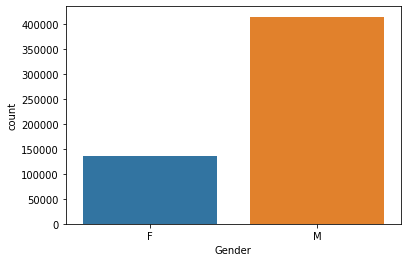

In [32]:
#Identifying Gender of major puchasers
import seaborn as sns
sns.countplot(blackFridayData['Gender'])


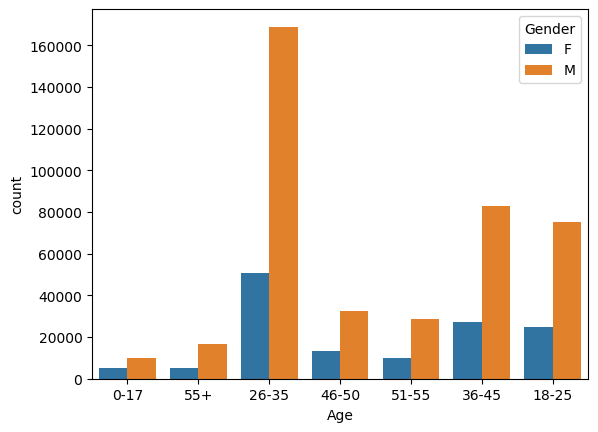

In [33]:
#Finding Biggest Customer range based on Age and Gender
sns.countplot(blackFridayData['Age'], hue=blackFridayData['Gender'])

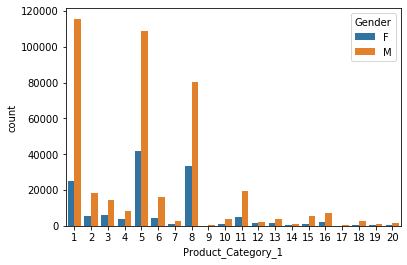

In [37]:
#Finding Biggest Customer range based on Gender and Product_Category_1
sns.countplot(blackFridayData['Product_Category_1'], hue=blackFridayData['Gender'])

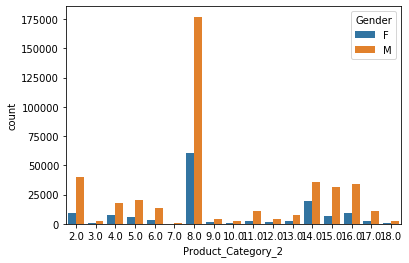

In [38]:
#Finding Biggest Customer range based on Gender and Product_Category_2
sns.countplot(blackFridayData['Product_Category_2'], hue=blackFridayData['Gender'])

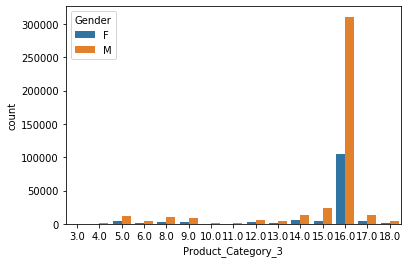

In [39]:
#Finding Biggest Customer range based on Gender and Product_Category_3
sns.countplot(blackFridayData['Product_Category_3'], hue=blackFridayData['Gender'])

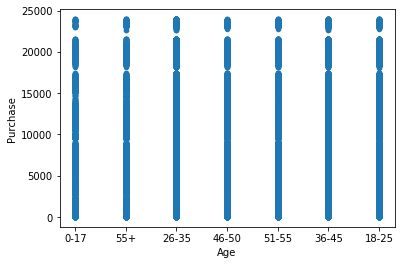

In [13]:
# Plotting scatter graph for age and purchase
blackFridayData.plot.scatter(x = 'Age', y = 'Purchase')

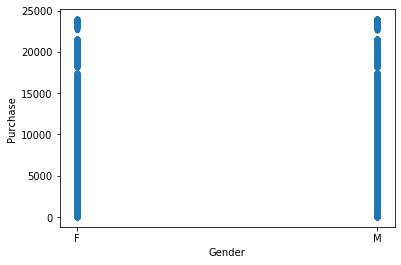

In [14]:
# Plotting scatter graph for Gender and purchase
blackFridayData.plot.scatter(x = 'Gender', y = 'Purchase')

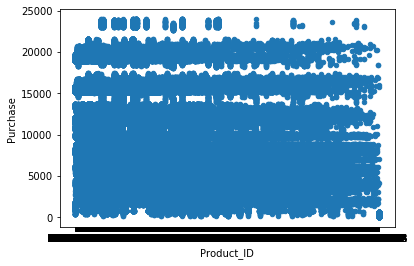

In [15]:
blackFridayData.plot.scatter(x = 'Product_ID', y = 'Purchase')

Text(0, 0.5, 'Purchase')

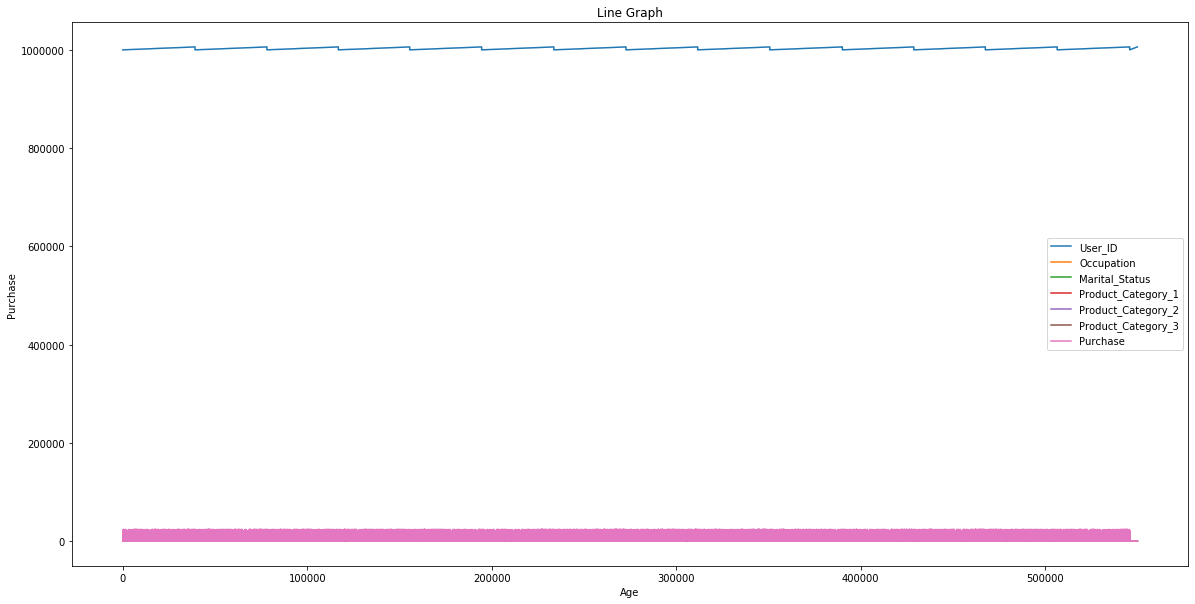

In [40]:
#Line Graph 
lg=blackFridayData.plot(figsize=(20,10),title='Line Graph')
lg.set_xlabel('Age')
lg.set_ylabel('Purchase')